In [11]:
# import packages

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector, plot_bloch_multivector, plot_histogram
from qiskit import transpile
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def state_eval(quantum_circuit):
    """ 
    Evaluates a 3-qubit circuit and prints the full quantum state including superpositions and phases
    """
    print(f"{'Input':<10} | {'Output State Vector'}")
    print("-" * 50)

    for i in range(8):
        # 1. Prepare Input
        qc_init = QuantumCircuit(3)
        input_str = format(i, '03b')
        
        for qubit_index, bit in enumerate(reversed(input_str)):
            if bit == '1':
                qc_init.x(qubit_index)
        
        # 2. Run Circuit
        full_circuit = qc_init.compose(quantum_circuit)
        state = Statevector(full_circuit)
        
        # 3. Get Amplitudes (Key Change)
        # to_dict() returns { '000': (0.707+0j), ... } for non-zero states only
        raw_dict = state.to_dict()
        
        # 4. Format the output string
        state_parts = []
        for basis_state, amp in raw_dict.items():
            # Clean up the complex number for printing
            # If imaginary part is tiny, ignore it. 
            if np.isclose(amp.imag, 0):
                amp_str = f"{amp.real:.3f}" # e.g., "0.707"
            else:
                amp_str = f"{amp:.2f}"      # e.g., "(0.70+0.70j)"
            
            state_parts.append(f"{amp_str}|{basis_state}>")
        
        # Join them with " + "
        output_str = " + ".join(state_parts)
        
        print(f"|{input_str + '>':<9} | {output_str}")

Input      | Output State Vector
--------------------------------------------------
|000>      | 1.000|000> + 0.000|001>
|001>      | 0.000|000> + 1.000|001>
|010>      | 1.000|010> + 0.000|011>
|011>      | 0.000|010> + 1.000|011>
|100>      | 0.71+0.71j|100> + 0.000|101>
|101>      | 0.000|100> + 0.71+0.71j|101>
|110>      | 0.000|110> + 0.71-0.71j|111>
|111>      | 0.71-0.71j|110> + 0.000|111>


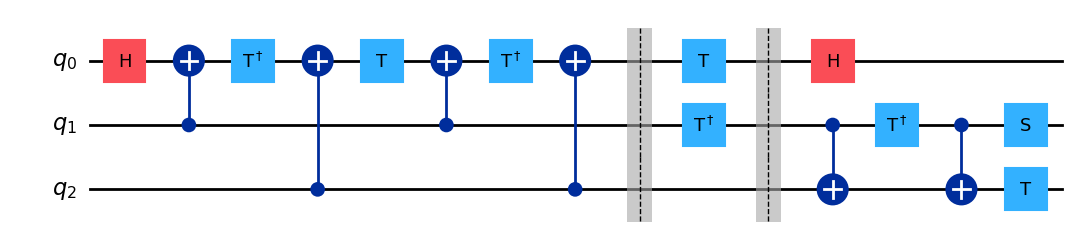

In [47]:
# initialize the equivalent (trial) quantum circuit decomposition of tofollio gate 

qc_toffoli_trial = QuantumCircuit(3)
qc_toffoli_trial.h(0)
qc_toffoli_trial.cx(1, 0)
qc_toffoli_trial.tdg(0)
qc_toffoli_trial.cx(2, 0)
qc_toffoli_trial.t(0)
qc_toffoli_trial.cx(1, 0)
qc_toffoli_trial.tdg(0)
qc_toffoli_trial.cx(2, 0)
qc_toffoli_trial.barrier()

qc_toffoli_trial.t(0)
qc_toffoli_trial.tdg(1)
qc_toffoli_trial.barrier()

qc_toffoli_trial.h(0)
qc_toffoli_trial.cx(1, 2)
qc_toffoli_trial.tdg(1)
qc_toffoli_trial.cx(1, 2)

qc_toffoli_trial.s(1)
qc_toffoli_trial.t(2)

state_eval(qc_toffoli_trial)
display(qc_toffoli_trial.draw(output='mpl'))

Trial circuit generates correct Toffoli up to a relative phase

## Transpiled Quantum Circuits

### CCX Toffoli

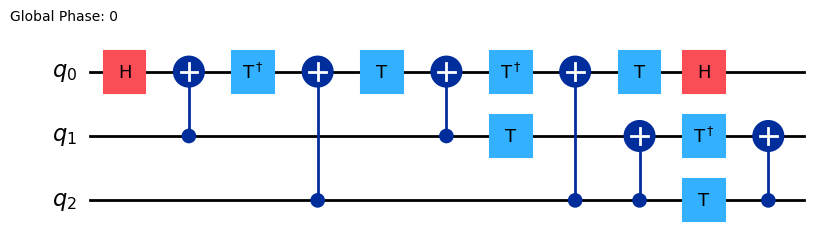

Input      | Output State Vector
--------------------------------------------------
|000>      | 1.000|000> + 0.000|001>
|001>      | 0.000|000> + 1.000|001>
|010>      | 1.000|010> + 0.000|011>
|011>      | 0.000|010> + 1.000|011>
|100>      | 1.000|100> + 0.000|101>
|101>      | 0.000|100> + 1.000|101>
|110>      | 0.000|110> + 1.000|111>
|111>      | 1.000|110> + 0.000|111>


In [58]:
qc_toffoli_perfect = QuantumCircuit(3)
qc_toffoli_perfect.ccx(2, 1, 0) 

qc_toffoli_transpiled_ccx = transpile(qc_toffoli_perfect, basis_gates=['s', 'cx', 'h', 't', 'tdg'])
display(qc_toffoli_transpiled_ccx.draw(output='mpl'))

state_eval(qc_toffoli_transpiled_ccx)

### CXC Toffoli

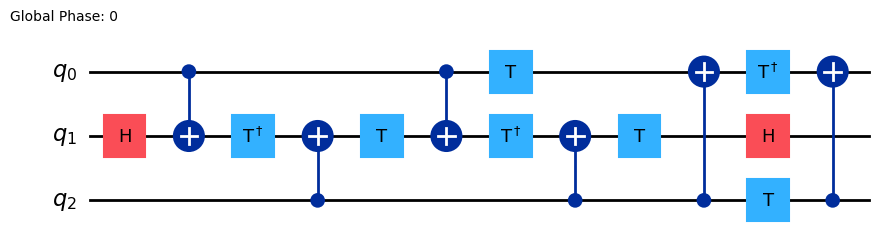

Input      | Output State Vector
--------------------------------------------------
|000>      | 1.000|000> + 0.000|010>
|001>      | 1.000|001> + 0.000|011>
|010>      | 0.000|000> + 1.000|010>
|011>      | 0.000|001> + 1.000|011>
|100>      | 1.000|100> + 0.000|110>
|101>      | 0.000|101> + 1.000|111>
|110>      | 0.000|100> + 1.000|110>
|111>      | 1.000|101> + 0.000|111>


In [59]:
qc_toffoli_perfect = QuantumCircuit(3)
qc_toffoli_perfect.ccx(2, 0, 1) 

qc_toffoli_transpiled_ccx = transpile(qc_toffoli_perfect, basis_gates=['s', 'cx', 'h', 't', 'tdg'])
display(qc_toffoli_transpiled_ccx.draw(output='mpl'))

state_eval(qc_toffoli_transpiled_ccx)

### XCC Toffoli

In [ ]:
qc_toffoli_perfect = QuantumCircuit(3)
qc_toffoli_perfect.ccx(2, 0, 1) 

qc_toffoli_transpiled_ccx = transpile(qc_toffoli_perfect, basis_gates=['s', 'cx', 'h', 't', 'tdg'])
display(qc_toffoli_transpiled_ccx.draw(output='mpl'))

state_eval(qc_toffoli_transpiled_ccx)